###Load dataset

In [1]:
import pandas as pd

In [2]:
wine_df = pd.read_csv('/content/Wine_clust .csv')

In [3]:
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


###Import libraries

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


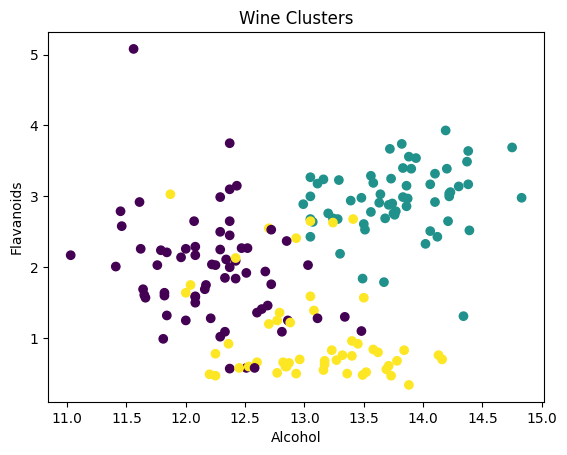

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Assuming dataset has features relevant for clustering

features = ['Alcohol', 'Flavanoids', 'Malic_Acid']

# Select the relevant columns from the DataFrame
X = wine_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
n_clusters = 3

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
wine_df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(wine_df['Alcohol'], wine_df['Flavanoids'], c=wine_df['cluster'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('Wine Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


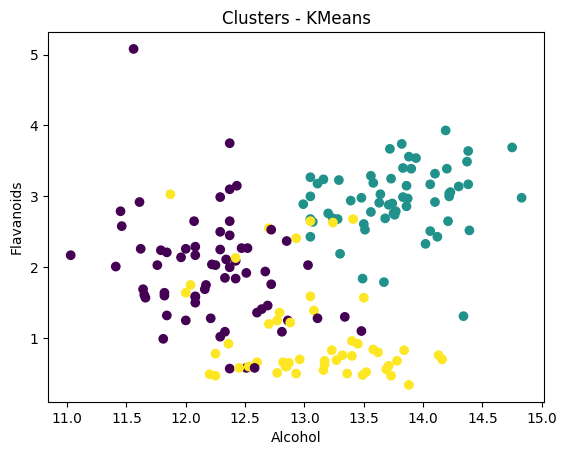

Silhouette Score for KMeans: 0.4301818451480096


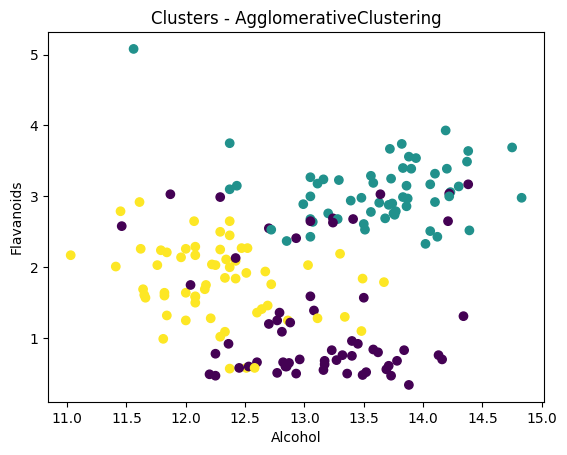

Silhouette Score for AgglomerativeClustering: 0.38545402504227644


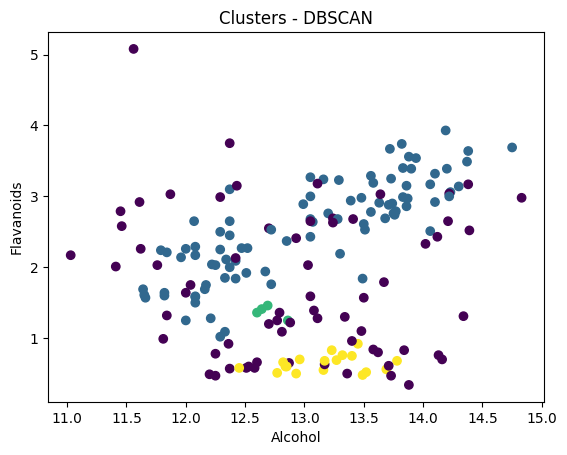

Silhouette Score for DBSCAN: -0.05118589100514992


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


features = ['Alcohol', 'Flavanoids', 'Malic_Acid']

# Select the relevant columns from the DataFrame
X = wine_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List of clustering algorithms to try
algorithms = [
    KMeans(n_clusters=3, random_state=42),
    AgglomerativeClustering(n_clusters=3),
    DBSCAN(eps=0.5, min_samples=5)
]

# Iterate over the algorithms and visualize the clusters
for algorithm in algorithms:
    # Fit the model and predict clusters
    if isinstance(algorithm, DBSCAN):
        # DBSCAN does not predict cluster labels, instead it assigns labels -1 for noise
        wine_df['cluster'] = algorithm.fit_predict(X_scaled)
    else:
        wine_df['cluster'] = algorithm.fit_predict(X_scaled)

    # Visualize the clusters
    plt.scatter(wine_df['Alcohol'], wine_df['Flavanoids'], c=wine_df['cluster'], cmap='viridis')
    plt.xlabel('Alcohol')
    plt.ylabel('Flavanoids')
    plt.title(f'Clusters - {algorithm.__class__.__name__}')
    plt.show()

    # Evaluate the silhouette score
    silhouette_avg = silhouette_score(X_scaled, wine_df['cluster'])
    print(f"Silhouette Score for {algorithm.__class__.__name__}: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

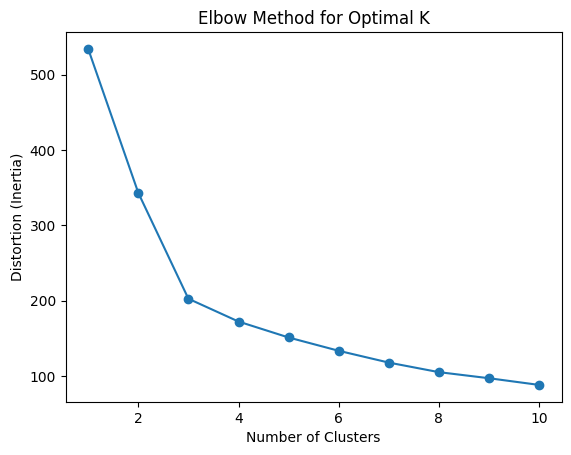

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


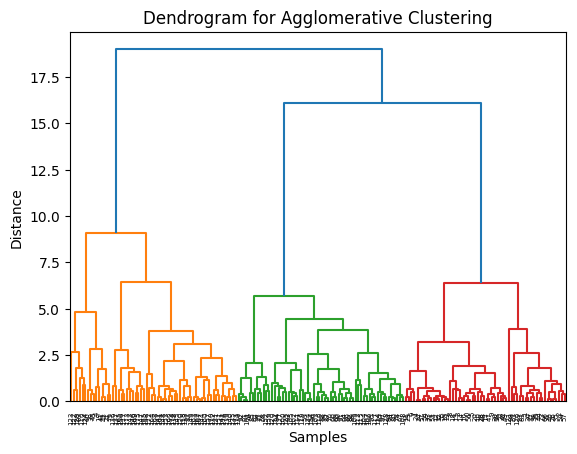

Silhouette Score for KMeans: 0.4301818451480096
Silhouette Score for Agglomerative Clustering: 0.38545402504227644


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


features = ['Alcohol', 'Flavanoids', 'Malic_Acid']

# Select the relevant columns from the DataFrame
X = wine_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters for KMeans using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow method, you can choose the optimal number of clusters for KMeans
optimal_kmeans_clusters = 3  # Adjust based on the elbow method result

# Creating the KMeans model with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_kmeans_clusters, random_state=42)
wine_df['kmeans_cluster'] = kmeans_model.fit_predict(X_scaled)

# Finding the optimal number of clusters for Agglomerative Clustering using dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

# Plotting the dendrogram
dendrogram(linkage_matrix)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

# Based on the dendrogram, you can visually determine the optimal number of clusters for Agglomerative Clustering
optimal_agg_clusters = 3  # Adjust based on dendrogram visualization

# Creating the Agglomerative Clustering model with the optimal number of clusters
agg_model = AgglomerativeClustering(n_clusters=optimal_agg_clusters)
wine_df['agg_cluster'] = agg_model.fit_predict(X_scaled)

# Visualizing the clusters for both models

# Evaluate the silhouette score for both models
silhouette_avg_kmeans = silhouette_score(X_scaled, wine_df['kmeans_cluster'])
silhouette_avg_agg = silhouette_score(X_scaled, wine_df['agg_cluster'])

print(f"Silhouette Score for KMeans: {silhouette_avg_kmeans}")
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg_agg}")